In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


# what is my aim ??

 to predict the DEATH_EVENT 

In [6]:
import  seaborn as sns

In [3]:
df=pd.read_csv("../input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [10]:
#sns.pairplot(df)

# these are the assumptions that i am making 
1.Sex - Gender of patient Male = 1, Female =0
2.Age - Age of patient
3.Diabetes - 0 = No, 1 = Yes
4.Anaemia - 0 = No, 1 = Yes
5.High_blood_pressure - 0 = No, 1 = Yes
6.Smoking - 0 = No, 1 = Yes
7.DEATH_EVENT - 0 = No, 1 = Yes

# Missing data 

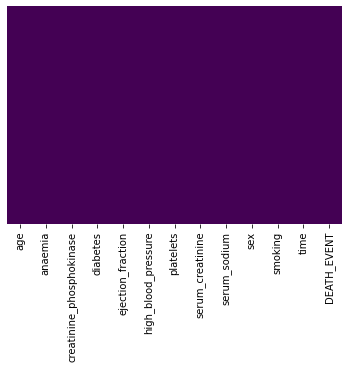

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

good there are no null values 

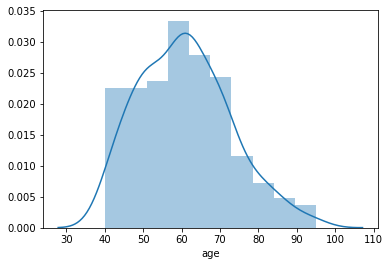

In [11]:
sns.distplot(df['age'])

In [21]:
import matplotlib.pyplot as plt 

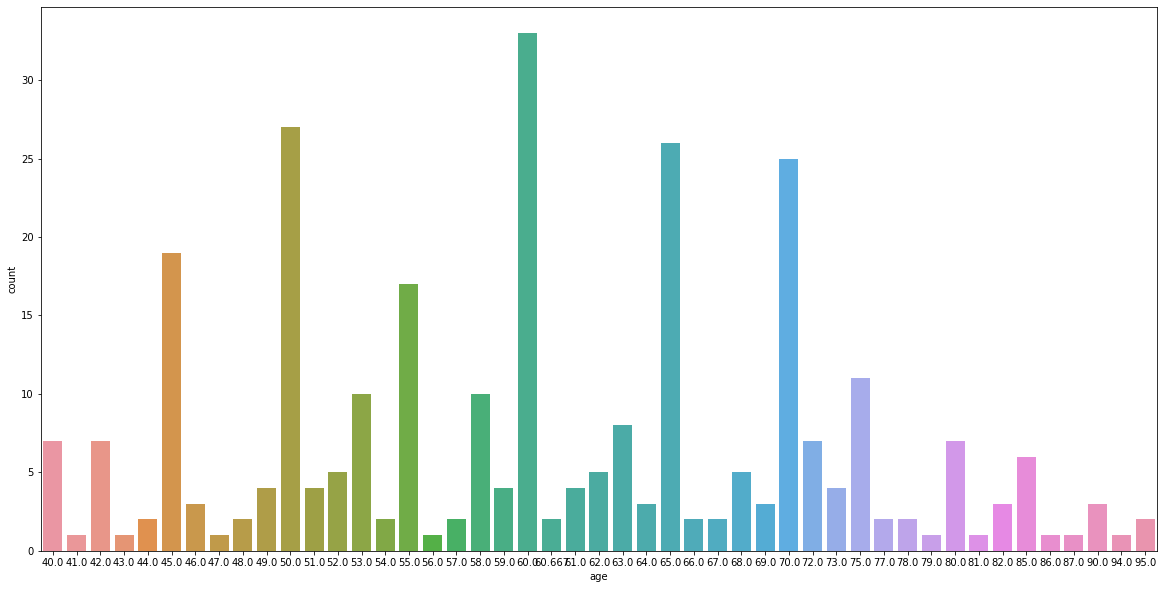

In [20]:
plt.figure(figsize=(20,10))
dia=sns.countplot(df['age'])

what all i can say from the grpah ??

i can say that:-
1. people of age of 60 are most effected 
2. people of age of 95 tend to be more healthy hahaha




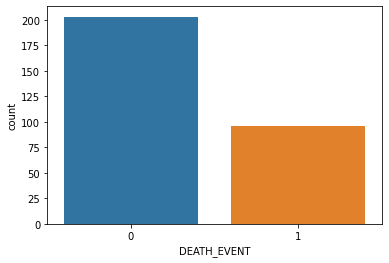

In [22]:
sns.countplot(df['DEATH_EVENT'])

this is somewhat a imbalanced data 

let us see which age group people are more prone to death 

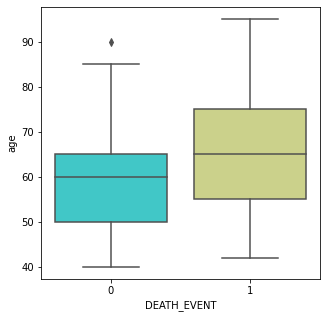

In [32]:
plt.figure(figsize=(5,5))
sns.boxplot(y="age", x="DEATH_EVENT", data=df,palette='rainbow')

lets know how men and women  are affected with heart failure 

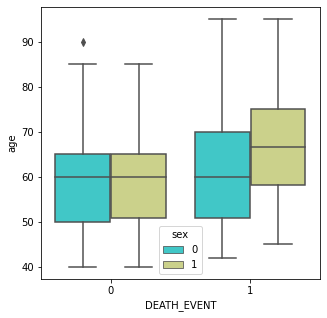

In [33]:
plt.figure(figsize=(5,5))
sns.boxplot(y="age", x="DEATH_EVENT",hue='sex', data=df,palette='rainbow')

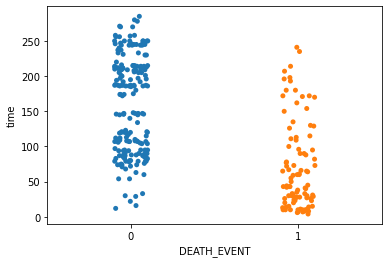

In [35]:
sns.stripplot(x="DEATH_EVENT", y="time", data=df)

how sugar patients are affected 

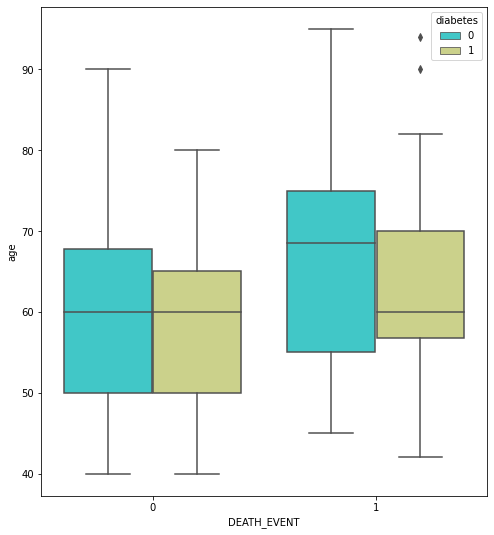

In [37]:
plt.figure(figsize=(8,9))
sns.boxplot(y="age", x="DEATH_EVENT",hue='diabetes', data=df,palette='rainbow')

let us see how people are affected by If the patient has hypertension (blood pressure)

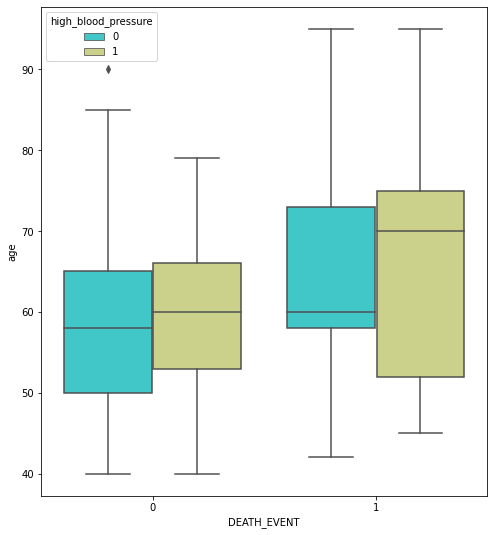

In [38]:
plt.figure(figsize=(8,9))
sns.boxplot(y="age", x="DEATH_EVENT",hue='high_blood_pressure', data=df,palette='rainbow')

In [39]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('DEATH_EVENT',axis=1), 
                                                    df['DEATH_EVENT'], test_size=0.30, 
                                                    random_state=101)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [45]:
predictions = logmodel.predict(X_test)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        62
           1       0.82      0.64      0.72        28

    accuracy                           0.84        90
   macro avg       0.84      0.79      0.81        90
weighted avg       0.84      0.84      0.84        90

